

You are given a `csv` file, which include various data entries for each football match in **English Premier League** during the 2020-2021 season. To name a few of these entries: date, referee name, number of goals, red cards, etc. The `csv` dataset you are provided contains one row per football match. The column names are abbreviations and given as: 

```
Div = League Division
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG = Full Time Home Team Goals
FTAG = Full Time Away Team Goals
FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HC = Home Team Corners
AC = Away Team Corners
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
```


In this exercise, you are asked to perform a number of operations to:

 - perform statistical analysis of the data, and

 - gain insights from the data.

In [41]:
# suggested imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from urllib import request
import scipy.stats as stats
from statsmodels import graphics
#import arviz as az
#import pymc3 as pm
#from pymc3 import glm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
import seaborn as sns
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")

In [42]:
module_url = f"https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

df = pd.read_csv('EPL_season-2021.csv')
df = df.fillna('')

Fetching https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv


In [3]:
df.head(12)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,2,6,12,12,2,3,2,2,0,0
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,3,5,14,11,7,3,2,1,0,0
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,6,3,9,6,9,0,1,0,0,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,3,2,13,7,8,7,2,2,0,0
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1,7,12,9,2,5,1,1,0,0
5,E0,13/09/2020,16:30,Tottenham,Everton,0,1,A,0,0,...,5,4,15,7,5,3,1,0,0,0
6,E0,14/09/2020,20:15,Brighton,Chelsea,1,3,A,0,1,...,3,5,8,13,4,3,1,0,0,0
7,E0,14/09/2020,18:00,Sheffield United,Wolves,0,2,A,0,2,...,2,4,13,7,12,5,2,1,0,0
8,E0,19/09/2020,12:30,Everton,West Brom,5,2,H,2,1,...,7,4,9,11,11,1,1,0,0,1
9,E0,19/09/2020,15:00,Leeds,Fulham,4,3,H,2,1,...,7,6,13,18,5,3,1,2,0,0


## P2.1 - Data Pre-processing and Exploratory Analysis 

In this question, your task is to use `pandas` and other required modules to preprocess the data frame, `df`. Preprocessing will include: add/remove/recode columns in `df`. In addition, to further explore the dataset, you need to produce a number of exploratory plots. 

#### P2.1.1 - Add Booking Points Columns 

Sometimes, in order to better analyse any given data set, one can create a new type of feature by combining two or more existing entries of the data frame. In this question, you are asked to create a function `add_booking_pts(df)` which creates two new columns of: **Home booking points (HBP)**, and **Away booking points (ABP)** by using four existing columns of HY, AY, HR, and AR.

The details of the function `add_booking_pts(df)` are given below:

 - Takes the data frame `df` as input.
 
 - For each match, number of yellow cards is weighted with 10 points, whilst the number of red cards is with 25 points. 
 
 - Basically, the function calculates HBP and ABP columns as
    - $HBP = 10\cdot HY + 25\cdot HR$
    - $ABP = 10\cdot AY + 25\cdot AR$
 
 - These newly created arrays are added to `df`, whilst removing the columns for HY, AY, HR, and AR.
 
 - Finally, the updated `df` is returned.

In [43]:
def add_booking_pts(df):
    # your code here
    df['HBP'] = 10 * df['HY'] + 25* df['HR'] # Add home booking points 𝐻𝐵𝑃=10⋅𝐻𝑌+25⋅𝐻𝑅
    df['ABP'] = 10 * df['AY'] + 25* df['AR'] # Add away booking points 𝐴𝐵𝑃=10⋅𝐴𝑌+25⋅𝐴𝑅
    return df
add_booking_pts(df)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,HBP,ABP
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,12,12,2,3,2,2,0,0,20,20
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,14,11,7,3,2,1,0,0,20,10
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,9,6,9,0,1,0,0,0,10,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,13,7,8,7,2,2,0,0,20,20
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,12,9,2,5,1,1,0,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,10,8,14,1,2,2,0,0,20,20
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,8,10,7,5,2,2,0,0,20,20
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,11,1,8,9,3,1,0,0,30,10
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,5,9,2,3,0,3,0,0,0,30


#### P2.1.2 - Convert Table Colums into Digits 

When reading in the dataframe, one can see that it contains some textual data which will not be relevant for the numerical analyses in Question 1. Therefore, implement a function `convert_results(df)` 

1. (1 mark) to convert **half-time results (HTR)** and **full-time results (FTR)** into numerical data. The details of the function are given below: 
 
- HTR and FTR columns include string values of `'H'`, `'D'` and `'A'`. These string corresponds to the cases below:
    - `'H'`: Home team win

    - `'D'`: Draw

    - `'A'`: Away team win

- The function `convert_results(df)` will replace `'H'`, `'D'` and `'A'` values with `int` type values of of 1, 0, -1, respectively.

2. (1 mark) to convert **Time** column into `float` type values in interval of $[0, 24)$. Since an hour has 60 minutes, a 15-minute interval corresponds to quarter of an hour (i.e 0.25 hours). Considering this, some examples can be given:
 
- `'12.30'` will be `12.5`, or 
 
- `'18.15'` will be `18.25` or 
 
- `'17.00'` will be `17.0`
 
The function `convert_results(df)` should return the updated data frame `df`.

In [44]:
def convert_results(df):
    length = len(df)
    df.loc[ df["HTR"] == "H", "HTR"] = 1 # changing HTR column to 1,0 or -1 
    df.loc[ df["HTR"] == "D", "HTR"] = 0
    df.loc[ df["HTR"] == "A", "HTR"] = -1
    
    df.loc[ df["FTR"] == "H", "FTR"] = 1
    df.loc[ df["FTR"] == "D", "FTR"] = 0
    df.loc[ df["FTR"] == "A", "FTR"] = -1
    
    for x in range(0,length):
        val = df['Time'].values[x]
        number_dec = str(val).split(':')[-1] # splitting at ':' to get the minutes and hours
        number_dec = int(number_dec)         # storing the minutes values
        number_int = str(val).split(':')[0] # Getting the hour values
        ans = number_dec/60 + int(number_int) #Dividing minutes by 60 and adding with the hrs
        
        df['Time'].values[x] = ans
    
    return df
convert_results(df)


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,HBP,ABP
0,E0,12/09/2020,12.5,Fulham,Arsenal,0,3,-1,0,1,...,12,12,2,3,2,2,0,0,20,20
1,E0,12/09/2020,15.0,Crystal Palace,Southampton,1,0,1,1,0,...,14,11,7,3,2,1,0,0,20,10
2,E0,12/09/2020,17.5,Liverpool,Leeds,4,3,1,3,2,...,9,6,9,0,1,0,0,0,10,0
3,E0,12/09/2020,20.0,West Ham,Newcastle,0,2,-1,0,0,...,13,7,8,7,2,2,0,0,20,20
4,E0,13/09/2020,14.0,West Brom,Leicester,0,3,-1,0,0,...,12,9,2,5,1,1,0,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16.0,Liverpool,Crystal Palace,2,0,1,1,0,...,10,8,14,1,2,2,0,0,20,20
376,E0,23/05/2021,16.0,Man City,Everton,5,0,1,2,0,...,8,10,7,5,2,2,0,0,20,20
377,E0,23/05/2021,16.0,Sheffield United,Burnley,1,0,1,1,0,...,11,1,8,9,3,1,0,0,30,10
378,E0,23/05/2021,16.0,West Ham,Southampton,3,0,1,2,0,...,5,9,2,3,0,3,0,0,0,30


#### P2.1.3 - Fair Play League Table 

Write a function `create_fair_play_table(df)` to depict a **barplot with horizontal bars** representing *total booking points*. The module `seaborn` and its corresponding methods and attributes must be used in this question.

Produce a bar for each team (use the HBP and ABP columns) and plot them in increasing order. The team with the top bar (*i.e.* lowest HBP+ABP) will represent the Fair Play League Champion. Also, print the statement below

```
The champions of the 2020-2021 Fair Play League is {locate the team here}.
```

![](https://drive.google.com/uc?export=view&id=11gYwhu-1D6dxEcmXK31pL5Zcop497w9i)

In [45]:
df["Total_score"] = df["HBP"] + df["ABP"] # Getting the total score by adding HBP and ABP
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AF,HC,AC,HY,AY,HR,AR,HBP,ABP,Total_score
0,E0,12/09/2020,12.5,Fulham,Arsenal,0,3,-1,0,1,...,12,2,3,2,2,0,0,20,20,40
1,E0,12/09/2020,15.0,Crystal Palace,Southampton,1,0,1,1,0,...,11,7,3,2,1,0,0,20,10,30
2,E0,12/09/2020,17.5,Liverpool,Leeds,4,3,1,3,2,...,6,9,0,1,0,0,0,10,0,10
3,E0,12/09/2020,20.0,West Ham,Newcastle,0,2,-1,0,0,...,7,8,7,2,2,0,0,20,20,40
4,E0,13/09/2020,14.0,West Brom,Leicester,0,3,-1,0,0,...,9,2,5,1,1,0,0,10,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16.0,Liverpool,Crystal Palace,2,0,1,1,0,...,8,14,1,2,2,0,0,20,20,40
376,E0,23/05/2021,16.0,Man City,Everton,5,0,1,2,0,...,10,7,5,2,2,0,0,20,20,40
377,E0,23/05/2021,16.0,Sheffield United,Burnley,1,0,1,1,0,...,1,8,9,3,1,0,0,30,10,40
378,E0,23/05/2021,16.0,West Ham,Southampton,3,0,1,2,0,...,9,2,3,0,3,0,0,0,30,30


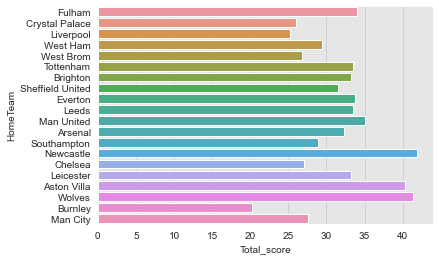

In [52]:
df["Total_score"] = df["HBP"] + df["ABP"]
def create_fair_play_table(df):
    # your code here
    bar = sns.barplot(data=df, x="Total_score" , y = "HomeTeam",ci= None) # barplot of total score
    
    return 
df_fp = create_fair_play_table(df)

### P2.1.4 - Expected number of goals vs. Exact scores

Expected number of goals (xG) is a predictive model used to assess every goal-scoring chance, and the likelihood of scoring. Nowadays, xG has a strong algorithm behind it, but in this example, we will assume two basic models to calculate the xG of any football team for any game:
 
 - $xG_1 = 0.1 \cdot S$
 
 - $xG_2 = 0.1 \cdot S + 0.05\cdot SoT$

where $S$ and $SoT$ is the total number of shoots and total shoots on target, respectively.

Write a function `xG_plot(df)` to plot $xG_1$, $xG_2$ and exact number of goals scored by a randomly selected football team for whole 38 game weeks. 

This exploratory analysis will depict two sub-plots:
 
 1. Running mean of all three variables (xG1, xG2 and Goals). Running mean shows the average of a value up to a time step. For example: running mean of xG1 for week 5 is $\frac{1}{5}\sum_{i=0}^{4}xG1_{i}$, or similarly for week 17 is $\frac{1}{17}\sum_{i=0}^{16}xG1_{i}$.

 2. Cumulative sum of all three variables (xG1, xG2 and Goals). (Hint: `np.cumsum()`)

Use different colours, line styles, legends, etc. to make the exploratory analysis more understandable. The function also returns calculated xGs for the randomly selected team in a `dict` type object of form `{team : (xG1, xG2)}`

![](https://drive.google.com/uc?export=view&id=1Y3uSzRQaKumgoKoNdkohYBhpgBrOkYeO)

In [22]:
# Calculating the week of the game 

from datetime import datetime

date = df['Date']
df['Date_new'] = pd.to_datetime(df['Date'], format="%d/%m/%Y") 
df['Week_Number'] = df['Date_new'].dt.isocalendar().week # Finding out the week of the calendar year
n = df.Week_Number.nunique()  # Getting the number of unique week numbers
length = len(df)
ct = 1
array_new = np.empty(length,dtype=int)
for x in range(0,length-1): 
    val = df['Week_Number'].values[x] 
    if val ==  df['Week_Number'].values[x+1]:
       array_new[x] = ct 
    else:
      array_new[x] = ct
      x=x+1
      array_new[x] = ct+1
      ct = ct+1
array_new[x+1] = ct
df['Match_week'] = array_new # Storing the week of the match



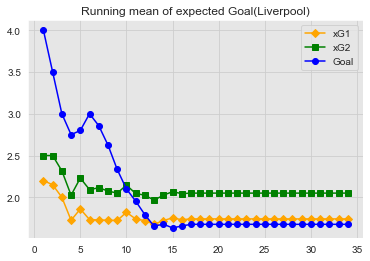

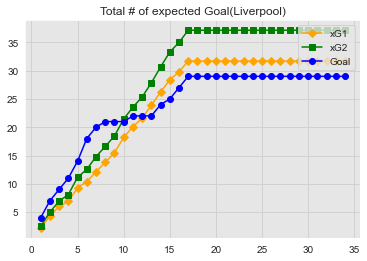

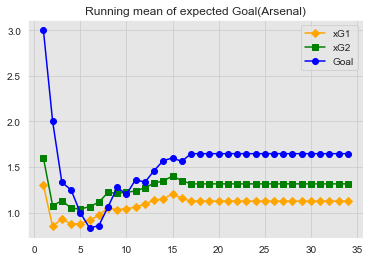

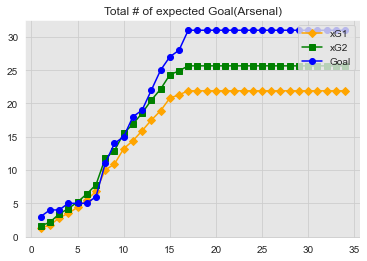

In [23]:
 def xG_plot(df,Type_of_team,fig_no1,fig_no2,Team_name):
    import matplotlib.pyplot as pl
    
    # choosing the appropriate score values based on the Type of team
    if Type_of_team == "Home team":
       
       df['𝑥𝐺1'] = 0.1*df['HS']
       df['𝑥𝐺2'] = 0.1*df['HS']+0.05* df['HST']
       df['Total_Goals']= df['FTHG'] 
       df_team = df.loc[df['HomeTeam'] == Team_name]
    
    elif Type_of_team == "Away team":
         
         df['𝑥𝐺1'] = 0.1*df['AS']
         df['𝑥𝐺2'] = 0.1*df['AS']+0.05* df['AST']
         df['Total_Goals']= df['FTAG']
         df_team = df.loc[df['AwayTeam'] == Team_name]
        
    week_mean_xG1= df_team.groupby('Match_week')['𝑥𝐺1'].mean() # Calculating the mean of xG1 based on the week
    week_mean_xG2 = df_team.groupby('Match_week')['𝑥𝐺2'].mean() # Calculating the mean of xG2 based on the week
    week_mean_Goal = df_team.groupby('Match_week')['Total_Goals'].mean() # Calculating the mean of total goals by week
    
    week_sum_xG1= df_team.groupby('Match_week')['𝑥𝐺1'].sum() # Calculating the sum of xG1 based on the week
    week_sum_xG2 = df_team.groupby('Match_week')['𝑥𝐺2'].sum() # Calculating the sum of xG1 based on the week
    week_sum_Goal = df_team.groupby('Match_week')['Total_Goals'].sum() # Calculating the sum of total goals by week
    
    week_mean_xG1= np.array(week_mean_xG1) 
    week_mean_xG2= np.array(week_mean_xG2)
    week_mean_Goal= np.array(week_mean_Goal)
    
    week_sum_xG1= np.array(week_sum_xG1) 
    week_sum_xG2= np.array(week_sum_xG2)
    week_sum_Goal= np.array(week_sum_Goal)
    
    #calculating the Cumulative sum
    cum_sum_xG1 = np.cumsum(week_sum_xG1)
    cum_sum_xG2 = np.cumsum(week_sum_xG2)
    cum_sum_Goal = np.cumsum(week_sum_Goal)
    
    run_mean_xG1_all=[]
    run_mean_xG2_all=[]
    run_mean_Goal_all=[]
    
    run_sum_xG1_all=[]
    run_sum_xG2_all=[]
    run_sum_Goal_all=[]
    
    # Calculation of running mean
    for val in range(0,34):
        run_mean_xG1 = np.mean(week_mean_xG1[0:val+1])  
        run_mean_xG1_all = np.append(run_mean_xG1_all,run_mean_xG1)
        run_mean_xG2 = np.mean(week_mean_xG2[0:val+1])  
        run_mean_xG2_all = np.append(run_mean_xG2_all,run_mean_xG2)
        run_mean_Goal = np.mean(week_mean_Goal[0:val+1])  
        run_mean_Goal_all = np.append(run_mean_Goal_all,run_mean_Goal)
        week_num = np.arange(1,35)
        
    # Calculation of Cumulative sum       
    for val in range(0,34):
        run_sum_xG1 = np.sum(week_sum_xG1[0:val+1])  
        run_sum_xG1_all = np.append(run_sum_xG1_all,run_sum_xG1)
        run_sum_xG2 = np.sum(week_sum_xG2[0:val+1])  
        run_sum_xG2_all = np.append(run_sum_xG2_all,run_sum_xG2)
        run_sum_Goal = np.sum(week_sum_Goal[0:val+1])  
        run_sum_Goal_all = np.append(run_sum_Goal_all,run_sum_Goal)
    
    #Plotting the required results
        
    plt.figure(fig_no1)
    plt.plot(week_num, run_mean_xG1_all, 'D-', color="orange", label = "xG1")
    plt.plot(week_num, run_mean_xG2_all, 'gs-', label = "xG2")  
    plt.plot(week_num, run_mean_Goal_all, 'bo-',label = "Goal")
    plt.legend(loc="upper right")
    plt.title("Running mean of expected Goal" + "(" + Team_name + ")")
    
    plt.figure(fig_no2)
    plt.plot(week_num,run_sum_xG1_all , 'D-', color="orange", label = "xG1")
    plt.plot(week_num,run_sum_xG2_all , 'gs-', label = "xG2")  
    plt.plot(week_num, run_sum_Goal_all, 'bo-',label = "Goal")
    plt.legend(loc="upper right")
    plt.title("Total # of expected Goal" + "(" + Team_name + ")")
    
    Team_score = {Team_name : (week_mean_xG1, week_mean_xG2)}
    return Team_score 

Type_of_team = "Home team"
Team_name = "Liverpool"
xG = xG_plot(df,Type_of_team,1,2,Team_name)

Type_of_team = "Away team"
Team_name = "Arsenal"
xG = xG_plot(df,Type_of_team,3,4,Team_name)



In [ ]:
## P2.2 - Statistical Analysis (29 marks)

#### P2.2.1 - Model selection for Regression Analysis

In this question, we construct a regression analyses to investigate how well FTHG (or FTAG) can be predicted from the other variables in the dataframe. The objective of this question is to derive a sparse model (linear and polynomial) with fewer variables. 

#### P2.2.1.1 - Variable Selection for Linear Regression (5 marks)

In **variable selection** ('variable' means the same as 'predictor'), variables get iteratively added or removed from the regression model. Once finished, the model typically contains only a subset of the original variables. It makes it easier to interpret the model, and in some cases it makes it generalise better to new data. 

To perform variable selection, create a function `select_variable(df, main_pred, main_target, alpha)`, where 
 
 - `main_pred` is a dictionary of variables. For this analysis, firstly, either all Home or Away teams will be marked and the predictors given below will be used

  - Home: [Time, FTR, HTHG, HTR, HS, HST, HF, HC, HBP]
  
  - Away: [Time, FTR, HTAG, HTR, AS, AST, AF, AC, ABP]. 
 
 - `main_target` is the variable for the regression, Home: FTHG (or Away: FTAG)
 
 - `alpha` is the significance level for selecting significant predictors

The function should return

 - `main_pred` is the dictionary which stores the selected subset of initial `main_pred` both for home and away teams, in a format of `main_pred = {'Home': [... selected predictors here ...], 'Away': [... selected predictors here ...]}`.

To calculate regression fits and $p$-values you will use `statsmodels`. The general procedure follows two stages:

 - Stage 1 (adding predictors): you build a model by adding variables one after the other. You keep adding variables that increase the **adjusted $R^2$** value (provided by `statsmodels` package). 
  
  - Start with an empty set of variables
  
  - Fit multiple one-variable regression models. In each iteration, use one of the variables provided in predictors. The variable that leads to the largest increase in adjusted $R^2$ is added to the model.
  
  - Now proceed by adding a second variable into the model. Starting from the remaining variables, again choose the variable that leads to the largest increase in adjusted $R^2$.
  
  - Continue in the same way for the third, fourth, … variable.
  
  - You are finished when there is no variable left that increases adjusted $R^2$.
 
 - Stage 2 (removing non-significant predictors): if any of the utilised predictors are not significant, you need to remove them. Keep removing variables until all variables in the model are significant.

  - Start by fitting a model using the variables that have been added to the model in Stage 1.
  
  - If there is a variable that is not significant, remove the variable with the largest $p$-value and fit the model again with the reduced set of variables.
  
  - Keep removing variables and re-fitting the model until all remaining variables are significant.
  
  - The remaining significant variables are the output of your function.

In [24]:
def select_variable(Team_type,df, main_pred, main_target, alpha):
    
    import statsmodels.api as sm
 
    
    multi_R = 0
    pred_var = []
    R_sqr_multi = 0
    R = 0
    Y = df[main_target]
    R_multi_prev = 0
    R_adj = 0
    l =len(main_pred)
    var_final = []
    while main_pred:
          for pred in main_pred:   # Looping through the main_pred array 
            X = df[pred]  # Adding the pred variable as independant value
            X = sm.add_constant(X) # adding a constant to X
            model = sm.OLS(Y, X).fit() # OLS model creation 
            predictions = model.predict(X)  # Fitting the model
            R_sqr = model.rsquared # Getting the rsquare value
   
            if R_sqr > R:
               R = R_sqr
               pred_var.append(pred) 
               main_pred.remove(pred) # Appending the main_pred array
         
         
          R = 0
          R_multi_prev = R_sqr_multi
          X_multi = df[pred_var]
          X_multi = sm.add_constant(X_multi) # adding a constant
          model_multi = sm.OLS(Y, X_multi).fit() # Fitting multiple regressors
          R_sqr_multi = model_multi.rsquared # Finding out the rsquare value
        
          if  R_sqr_multi > R_multi_prev:
              R_adj =  R_sqr_multi
              var_final = pred_var

# Stage 2
    for var in var_final:    
        X = df[var]
        X = sm.add_constant(X) # adding a constant
        model = sm.OLS(Y, X).fit() # Fitting the OLS model 
        predictions = model.predict(X) 
        p_val = model.pvalues.loc[var]
     
       
        if p_val > alpha: # checking if p value is greater than 0.05
           var_final.remove(var) # removing the value if p value is greater than 0.05
               
    return {Team_type :[var_final]}


# Calling the function for Home
Team_type = "Home"
main_pred = ["HTHG", "HS", "HST","HF","HC","HBP"]
main_target = "FTHG" 
alpha = 0.05
output_val_home = select_variable(Team_type,df, main_pred, main_target, alpha)

# Calling the function for Away
Team_type = "Away"
main_pred =  ["HTAG","AS", "AST", "AF", "AC", "ABP"]
main_target = "FTAG" 
alpha = 0.05
output_val_away = select_variable(Team_type,df, main_pred, main_target, alpha)

main_pred = {} 
for d in (output_val_home, output_val_away): main_pred.update(d)
main_pred


C:\Users\Teresa George\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Teresa George\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Teresa George\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Teresa George\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Teresa George\anaconda3\lib\site-packages\stats

{'Home': [['HTHG', 'HS', 'HST', 'HF', 'HBP']],
 'Away': [['HTAG', 'AS', 'AST', 'ABP']]}

#### P2.2.1.2 - Model Selection for Polynomial Regression

Often the dataset provided is not linearly separable and a simple linear regression model may not be able to derive relationships between both the independent and dependent variables. In such cases, a possible solution would be to implement polynomial regression instead (https://en.wikipedia.org/wiki/Polynomial_regression). Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n^{th}$ degree polynomial in $x$.

**Example:** Given $y$ the dependent variable, $x_1, x_2$ the independent variables, $b_0$ the bias and $b_1,b_2,...,b_n$ the weights a polynomial regression of degree 2 would have the form:

$$y = b_0 + b_1x_1 + b_2x_1^2 + b_3x_2 + b_4x_2^2$$

Implement a function `polynomial_model(df, main_pred, main_target, degrees)` which uses the selected subset of variables as an argument from the function `select_variable()`, and calculates all possible combinations of the variable set and polynomial degrees. The function `polynomial_model()` finds the degree that yields the best polynomial model (according to the adjusted R-squared metric) to predict the value of a FTHG or FTAG as in the linear regression part above.

Arguments and outputs of the function are given as

 - a dataframe `df`, 

 - a dictionary `main_pred` indicating the predictors for home and away, 
 
 - a dictionary `main_target` indicating target variable for home and away, 
 
 - a list of integers indicating the degrees to test degrees, 
 
The function should return 

 - the best fitted regression model, and best polynomial degree for home and away in a dictionary `main_predp` of format `main_predp = {'Home': (best_fit, best_degree), 'Away': (best_fit, best_degree)}`..

In [25]:
def polynomial_model(team_type, df, main_pred, main_target, degrees):
    # your code here
    from sklearn.preprocessing import PolynomialFeatures
    import statsmodels.api as sm
    main_pred = pd.DataFrame.from_dict(main_pred)
    main_pred = np.array(main_pred[team_type])
    ped_var = main_pred[0]
    y = df[main_target]
    
    
    best_deg = 0
    best_predict = []
    R = 0
    degrees = np.arange(1,5)
    for d in degrees:  
        pred_vari = []
        for v in ped_var:
            pred_vari.append(v)
            polynomial_features= PolynomialFeatures(degree=d)
            x = df[pred_vari]
            xp = polynomial_features.fit_transform(x) # Finding polynomial features
            model = sm.OLS(y, xp).fit() # Fitting the OLS model
            ypred = model.predict(xp)
            R_sqr = model.rsquared # Getting the R square values
            if R_sqr > R:
               R = R_sqr
               best_predict = pred_vari # Storing the best prediction variables 
               best_deg = d # Storing the best degree
               
            
    return best_predict, best_deg

# Call function to get main predict
Team_type = "Home"
main_pred = ["HTHG", "HS", "HST","HF","HC","HBP"]
main_target = "FTHG" 
alpha = 0.05
output_val_home = select_variable(Team_type,df, main_pred, main_target, alpha)

Team_type = "Away"
main_pred =  ["HTAG","AS", "AST", "AF", "AC", "ABP"]
main_target = "FTAG" 
alpha = 0.05
output_val_away = select_variable(Team_type,df, main_pred, main_target, alpha)

main_pred = {} 
for d in (output_val_home, output_val_away): main_pred.update(d)
main_pred

#Get the function for polynomial regression
degrees = np.arange(1,5)
team_type = "Home"
main_target = "FTHG" 
best_predict_home, best_deg_home = polynomial_model(team_type, df, main_pred, main_target, degrees)


team_type = "Away"
main_target = "FTAG" 
main_pred = {'Home': [['HTHG', 'HS', 'HST', 'HF', 'HBP']],'Away': [['HTAG', 'AS', 'AST', 'ABP']]}
best_predict_away, best_deg_away = polynomial_model(team_type, df, main_pred, main_target, degrees)

main_predp = {'Home': (best_predict_home, best_deg_home), 'Away': (best_predict_away, best_deg_away)}
main_predp

C:\Users\Teresa George\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Teresa George\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Teresa George\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Teresa George\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Teresa George\anaconda3\lib\site-packages\stats

{'Home': (['HTHG', 'HS', 'HST', 'HF', 'HBP'], 4),
 'Away': (['HTAG', 'AS', 'AST', 'ABP'], 4)}

#### P2.2.2 - Predicting Match Result


Create a function `predict_result()` which predicts the result of **Man City - Everton** football match which was played on 23/05/2021. In order to do this, firstly crop last last 10 rows of the data frame `df` to use only the first 37 weeks (370 matches) of the season to fit your regressors.

The function `predict_result()` will use `select_variable()` and `polynomial_model()` function outputs as the best linear and polynomial regression models. Then by using these two models, it predicts the number of goals scored by Home and Away teams separately, which will lead to the result of the match. Finally, print the information below:

```
Linear regression prediction        : Man City x - y Everton
Polynomial regression prediction    : Man City a - b Everton
Correct result                      : Man City 5 - 0 Everton
```

In [26]:
def predict_result(df, main_pred, main_predp, team1 = 'Man City', team2 = 'Everton'):
   # your code here
    from sklearn.preprocessing import PolynomialFeatures
    import statsmodels.api as sm
    
    df_train = df.iloc[:-10 , :]
    df_test = df.tail(10)
    Mancity_score =df_test.loc[df_test['Date'] == "23/05/2021"].values[6][5]
    Everton_score =df_test.loc[df_test['Date'] == "23/05/2021"].values[6][6]
    
    main_pred_linear = pd.DataFrame.from_dict(main_pred)
    main_pred_linear_home = np.array(main_pred_linear['Home'])
    predl_var_home = main_pred_linear_home[0]
    
    main_pred_linear_away = np.array(main_pred_linear['Away'])
    predl_var_away = main_pred_linear_away[0]
    
    main_predp = pd.DataFrame.from_dict(main_predp)
    predp_val_home = main_predp['Home'][0]
    predp_val_away = main_predp['Away'][0]
    
    
    pred_deg_home = main_predp['Home'][1]
    pred_deg_away = main_predp['Away'][1]
    
    FTHG = df_train['FTHG']
    FTAG = df_train['FTAG']
    
    #Linear regression prediction for home 
    X_linear_home_train = df_train[predl_var_home]
    X_linear_home_train = sm.add_constant(X_linear_home_train) # adding a constant
    X_linear_home_test = df_test[predl_var_home]
    X_linear_home_test = sm.add_constant(X_linear_home_test) # adding a constant
    model_FTHG_linear = sm.OLS(FTHG, X_linear_home_train).fit()
    predictions_linear_FTHG = model_FTHG_linear.predict(X_linear_home_test) 
    
    #Linear regression prediction for away
    X_linear_away_train = df_train[predl_var_away]
    X_linear_away_train = sm.add_constant(X_linear_away_train) # adding a constant
    X_linear_away_test = df_test[predl_var_away]
    X_linear_away_test = sm.add_constant(X_linear_away_test) # adding a constant
    model_FTAG_linear = sm.OLS(FTAG, X_linear_away_train).fit()
    predictions_linear_FTAG = model_FTAG_linear.predict(X_linear_away_test) 
    
    #polynomial regression prediction for home
   
    polynomial_features_home= PolynomialFeatures(degree=pred_deg_home)
    x_poly_home_train = df_train[predp_val_home]
    x_poly_home_test = df_test[predp_val_home]
    xp_home_train = polynomial_features_home.fit_transform(x_poly_home_train) 
    xp_home_test = polynomial_features_home.fit_transform(x_poly_home_test) 
    model_home = sm.OLS(FTHG, xp_home_train).fit()
    predictions_poly_FTHG = model_home.predict(xp_home_test)
    
     #polynomial regression prediction for  away
    
    polynomial_features_away= PolynomialFeatures(degree=pred_deg_away)
    x_poly_away_train = df_train[predp_val_away]
    x_poly_away_test = df_test[predp_val_away]
    xp_away_train = polynomial_features_away.fit_transform(x_poly_away_train) 
    xp_away_test = polynomial_features_away.fit_transform(x_poly_away_test) 
    model_away = sm.OLS(FTAG, xp_away_train).fit()
    predictions_poly_FTAG = model_away.predict(xp_away_test)
    
    
    print("Linear regression prediction: Man City  " + str((predictions_linear_FTHG[376])) + "-" +str(predictions_linear_FTAG[376])+ " Everton")
    print("Polynomial regression prediction: Man City  " + str(predictions_poly_FTHG[6]) + "-" +str(predictions_poly_FTAG[6])+ " Everton")
    print("Correct result : Man City  " + str(Mancity_score) + "-" +str(Everton_score)+ " Everton")

predict_result(df, main_pred, main_predp, team1 = 'Man City', team2 = 'Everton')

Linear regression prediction: Man City  3.8241142120979834-0.6127834976933569 Everton
Polynomial regression prediction: Man City  4.43357135754087-0.4101791892458264 Everton
Correct result : Man City  5-0 Everton


C:\Users\Teresa George\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### P2.2.3 - Maximum likelihood estimation (MLE) and prediction

In this question, you are expected to solve a regression problem, but this time using **maximum likelihood estimation (MLE)** theory. You need to construct a regression analysis to investigate how well the **full time results (FTR)** can be predicted from the other variables of FTHG, HS, HC, AS, AC. 

#### P2.2.3.1 - ML Estimate of regression parameters 

Create a function `ML_estimate(df_est, pred, target)` which calculates the ordinary least squares (OLS) and two MLE fits (Poisson and Probit) for the given arguments.

You need to use `statsmodels` module and its corresponding methods of `.OLS()`, `.Poisson()` and `.Probit()`.

- `df_est` is a subset of the data frame `df` which includes **randomly selected** 280 rows of `df`. The remaining 100 rows will be used in prediction application (see below).

- `pred` is a list of variables. For this analysis, OLS and other models utilise the predictors of FTHG, HS, HC, AS, AC. (Note: Depending on your implementation, you might need to add a constant to the predictors. Please see the lecture notes)

- `target` is the target variable for the regression, FTR. You need to adjust values of this column for the purpose of this question. 
 
  - FTR = 1.0 if Home team wins.
  
  - FTR = 0.0 if Away team wins or a Draw.

The function should return variables 

 - `MLE_model_fits` a `tuple` object which stores all three model fits `statsmodels` objects for OLS, Probit and Poisson.

In [28]:
module_url = f"https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
     a = f.read()
     outf.write(a.decode('utf-8'))

df = pd.read_csv('EPL_season-2021.csv')
df = df.fillna('')

# Making FTR values to 1.0 or 0.0
df.loc[ df["FTR"] == "H", "FTR"] = 1.0
df.loc[ df["FTR"] == "D", "FTR"] = 0.0
df.loc[ df["FTR"] == "A", "FTR"] = 0.0

def ML_estimate(df_est, pred, target):
    
    import statsmodels.api as sm
    from statsmodels.formula.api import glm
    from statsmodels.discrete.discrete_model import Probit
    from statsmodels.discrete.discrete_model import Poisson
    
    
    Y = df_est[target]
    X = df_est[pred]
    X = sm.add_constant(X)
    
    # Creating the three models : Poisson, Probit and OLS
    model_poisson = Poisson(Y.astype(float), X.astype(float), offset=None, exposure=None, missing='none', check_rank=True).fit()

    model_probit = Probit(Y.astype(float), X.astype(float)).fit()
    model_ols = sm.OLS(Y.astype(float), X.astype(float)).fit()
      
    # Creating a tuple with all 3 models
    MLE_model_fits = (model_poisson, model_probit, model_ols)
    return MLE_model_fits

pred = ["FTHG", "HS", "HC", "AS", "AC"]
df_est = df.sample(280)
df_test = df.drop(df_est.index)
target = "FTR"
MLE_model_fits = ML_estimate(df_est, pred, target)
MLE_model_fits

Fetching https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv
Optimization terminated successfully.
         Current function value: 0.642669
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.341917
         Iterations 7


(<statsmodels.discrete.discrete_model.PoissonResultsWrapper at 0x250b2f90d30>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x250b52a7d30>)

#### P2.2.3.2 - Predicting Home Win via MLE 

Create a function `ML_predict(df_pred, MLE_model_fits)` which calculates FTR predictions for all three models of OLS, Probit and Poisson.

You need to use `statsmodels`' method for prediction: `.predict()`.

- `df_pred` is a subset of the data frame `df` which includes only a subset of 100 rows of `df`.

- `MLE_model_fits` is a `tuple` object obtained from the `ML_estimate()` function above. Unpack this argument to obtain `statsmodels` objects for all three models. 

This function should return: 

 - `df_pred`

 - `MLE_model_predictions` is a `tuple` which stores the predicted outputs for each three models.  

In [29]:
def ML_predict(df_pred, MLE_model_fits):
    
    # Getting the predictions from the three models
    predict_poisson = MLE_model_fits[0].predict(df_pred)

    predict_probit = MLE_model_fits[1].predict(df_pred)
    predict_ols = MLE_model_fits[2].predict(df_pred)
   
    MLE_model_predictions = (predict_poisson, predict_probit, predict_ols)
    
    return df_pred, MLE_model_predictions, 

# Calling the functions
pred = ["FTHG", "HS", "HC", "AS", "AC"]
df_est = df.sample(280)
df_pred = df.drop(df_est.index)
df_pred = df_pred[pred]
df_pred = sm.add_constant(df_pred)
target = "FTR"

MLE_model_fits = ML_estimate(df_est, pred, target)
df_pred,MLE_model_predictions= ML_predict(df_pred, MLE_model_fits)
MLE_model_predictions

Optimization terminated successfully.
         Current function value: 0.650029
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327096
         Iterations 7


(11     0.429839
 13     0.156253
 15     0.786185
 16     0.402166
 25     0.591613
          ...   
 365    0.198195
 366    0.173223
 367    0.482695
 369    0.204651
 372    0.183790
 Length: 100, dtype: float64,
 11     0.647284
 13     0.001985
 15     0.995474
 16     0.482671
 25     0.993698
          ...   
 365    0.070252
 366    0.030686
 367    0.632162
 369    0.078488
 372    0.014840
 Length: 100, dtype: float64,
 11     0.531622
 13    -0.024927
 15     0.916946
 16     0.435536
 25     0.887353
          ...   
 365    0.197588
 366    0.136615
 367    0.503823
 369    0.202337
 372    0.072579
 Length: 100, dtype: float64)

#### P2.2.4 - Evaluating Prediction Performance

You will now need to visualise the prediction performance of the models, and evaluate them in terms of prediction accuracy, and mean square error (MSE) metrics. For this purpose, create a function `prediction_perf(gt, MLE_model_predictions)` which evaluates the prediction performance of the reference models. Up to this point, you should have obtained

 - $N = 100$ samples of predictions from each model, stored in `MLE_model_predictions`.
 
 - The ground-truth FTR values from data frames `df`, stored in `gt`.

Assume predicted values for a given model are stored in a variable $P$ and its average is $\bar{P}$. The first performance measure will be the MSE, and will be calculated for each model from the expression below:

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - FTR_i)^2$$

In order to obtain the prediction accuracy for each model, you first should convert continuous prediction results into the binary form (either 1.0 or 0.0). The binarisation process will follow the piecewise function below:

  $$P_{binary, i} = \begin{cases} 1.0, & P_i \geq \bar{P}\\ 0.0, & \text{otherwise}  \end{cases} \quad \text{where} \quad i = 0, 1, \dots, 99$$

Then the percentage accuracy, $Acc\%$ is calculated as

$$ Acc\% = 100 - \sum_{i=0}^{99} |P_{binary, i} - FTR_i|$$

Following these, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model. 

In order to obtain performance analysis results in a neatly way, you then need to create a new `pandas` dataframe `df_results` which will be in the form of

```
+----+-------------+--------+--------+-------+
|    | Model       |   Acc% |    MSE |   AUC |
+====+=============+========+========+=======+
|  0 | OLS         |  77.00 | 0.1260 | 0.911 |
+----+-------------+--------+--------+-------+
|  1 | MLE-Probit  |  81.00 | 0.1086 | 0.911 |
+----+-------------+--------+--------+-------+
|  2 | MLE-Poisson |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
```

Consequently, using `sklearn` method `RocCurveDisplay()`, the `prediction_perf()` function should 

 - `print` and `return` the data frame `df_results`.

**Marking for this question**
 - (2 marks) Calculating MSE and $Acc\%$ metrics correctly.
 - (3 marks) Creating and returning dataframe `df_results`.
 
with a condition that all these three operations are performed in a **fully working `prediction_perf()` function**.

In [30]:
def prediction_perf(gt, MLE_model_predictions):
    import numpy as np
    import pandas as pd
    from sklearn import metrics
    
    # Calculation of MSE and Accuracy
    MSE = [0] * 3
    Accuracy = [0] * 3
    roc_auc = [0] * 3
    ct_1 = 0
    for predict_val in MLE_model_predictions:
        MSE[ct_1] = np.mean(np.square(predict_val-gt))
        P_mean = np.mean(predict_val)
        ct = 0
        P_bin = [0] * 100
        for P in predict_val:
            if P>= P_mean:
               P_bin[ct]=1.0
               ct = ct+1
            else: 
               P_bin[ct]=0.0
               ct = ct+1
        Accuracy[ct_1] = 100 - np.sum(abs(P_bin-gt))
        
    
        # Calculation of AUC using sklearn
        roc_auc[ct_1] = metrics.roc_auc_score(gt.astype(float), predict_val.astype(float), sample_weight=None, max_fpr=None, multi_class='raise', labels=None) 
        ct_1 = ct_1 +1 
     
    # Creating a data frame
    Models= ['OLS','MLE-Probit','MLE-Poisson']
    data = list(zip(Models,MSE, Accuracy, roc_auc))
    df_results = pd.DataFrame(data, columns = ["Models",'MSE', 'Accuracy','AUC'])
    
    
    
    
    return df_results


# Calling the fumctions
module_url = f"https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
     a = f.read()
     outf.write(a.decode('utf-8'))

df = pd.read_csv('EPL_season-2021.csv')
df = df.fillna('')

df.loc[ df["FTR"] == "H", "FTR"] = 1.0
df.loc[ df["FTR"] == "D", "FTR"] = 0.0
df.loc[ df["FTR"] == "A", "FTR"] = 0.0

pred = ["FTHG", "HS", "HC", "AS", "AC"]
df_est = df.sample(280)
df_pred = df.drop(df_est.index)
target = "FTR"
gt = df_pred[target]
df_pred = df_pred[pred]
df_pred = sm.add_constant(df_pred)


MLE_model_fits = ML_estimate(df_est, pred, target)
df_pred,MLE_model_predictions= ML_predict(df_pred, MLE_model_fits)
prediction_perf(gt, MLE_model_predictions)

Fetching https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv
Optimization terminated successfully.
         Current function value: 0.667560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.361546
         Iterations 7


,Models,MSE,Accuracy,AUC
0,OLS,0.199733,88.0,0.913603
1,MLE-Probit,0.096093,87.0,0.930147
2,MLE-Poisson,0.114875,87.0,0.930147
